## Lesson 2: Data Cleaning - Handling Missing Values and Outliers

Welcome to Lesson 2! Now that you know the basics of R and data import, let's learn about **data cleaning** - one of the most important skills in data science.

**What is Data Cleaning?**
- The process of detecting and correcting errors and inconsistencies in data
- Handling missing values (NAs) and outliers
- Preparing data for analysis and visualization

**Why is it important?**
- Real-world data is often messy and incomplete
- Poor data quality leads to incorrect analysis results
- "Garbage in, garbage out" - clean data is essential for reliable insights


## Loading Required Packages

Before we can start working with data, we need to load some **packages** (also called "libraries"). Think of packages as toolkits that give R extra capabilities - like installing an app on your phone to do something new.

For data cleaning, we'll use the **tidyverse** collection of packages, which includes powerful tools for:
- **dplyr**: Data manipulation (filtering, selecting, mutating) - *like Excel's filter and sort, but more powerful*
- **ggplot2**: Data visualization - *creates professional charts and graphs*
- **tidyr**: Data reshaping and cleaning - *helps reorganize messy data*

### What does `library()` do?
The `library()` function loads a package so you can use its tools. You only need to install a package once (like downloading an app), but you need to load it with `library()` each time you start a new R session (like opening the app).

Let's load the tidyverse package that contains all these tools:

In [52]:
# Load necessary packages
library(tidyverse) # Loads dplyr, ggplot2, tidyr, and other data science tools

## Creating Sample Data with Missing Values and Outliers

For this lesson, we'll create a realistic dataset with **50 observations** that contains common data problems:
- **Missing values (NAs)**: Some data points are missing - *like blank cells in an Excel spreadsheet*
- **Outliers**: Extreme values that are very different from the rest - *imagine one employee earning $10 million in a company where most earn $50,000*

### About our sample dataset (50 rows):
| Column | Description | Business Example |
|--------|-------------|------------------|
| **ID** | Unique identifier (1-50) | Customer ID, Transaction ID |
| **Sales** | Sales amounts with 4 outliers (500, 10, 450, 15) | Revenue from individual transactions |
| **Profit** | Profit values with 3 outliers (-30, -25, 50) | Net profit per transaction |
| **Region** | Geographic regions (categorical data) | East, West, North, South territories |

**Missing values introduced:**
- 7 Sales values missing (rows 3, 7, 15, 22, 31, 38, 45)
- 5 Profit values missing (rows 5, 12, 19, 28, 42)

### Key Functions Explained:

**`set.seed(123)`** - The "Random Number Lock"
- R can generate random numbers, but sometimes we want the SAME random numbers every time
- `set.seed(123)` is like telling R "start your random number generator at position 123"
- This ensures everyone running this code gets identical results - essential for teaching!

**`data.frame()`** - Building a Table
- Creates a structured table (like an Excel spreadsheet) with named columns
- Each column can hold different types of data (numbers, text, dates)

**`rnorm(46, mean = 100, sd = 20)`** - Generating Random Numbers
- `rnorm` = "random normal" - creates random numbers following a bell curve pattern
- `46` = how many numbers to generate
- `mean = 100` = the average should be around 100
- `sd = 20` = standard deviation (how spread out the numbers are)
- *Think of it like: "Give me 46 sales figures that average around $100, varying by about $20"*

**`sample()`** - Random Selection
- Randomly picks items from a list
- `replace = TRUE` means items can be picked more than once
- *Like drawing names from a hat and putting them back each time*

**`c()`** - Combine Values
- Combines multiple values into a list/vector
- `c(1, 2, 3)` creates a list containing 1, 2, and 3

In [53]:
# 1. Creating a sample dataset with missing values and outliers
set.seed(123) # Ensures reproducible random numbers
data_clean <- data.frame(
  ID = 1:50, # Sequential ID numbers from 1 to 50
  Sales = c(rnorm(46, mean = 100, sd = 20), 500, 10, 450, 15), # 46 normal values + 4 outliers
  Profit = c(rnorm(47, mean = 10, sd = 5), -30, -25, 50), # 47 normal values + 3 outliers
  Region = sample(c("East", "West", "North", "South"), 50, replace = TRUE) # Random regions
)

# Introduce some missing values (more realistic with larger dataset)
data_clean[c(3, 7, 15, 22, 31, 38, 45), "Sales"] <- NA # Set 7 rows Sales to missing
data_clean[c(5, 12, 19, 28, 42), "Profit"] <- NA # Set 5 rows Profit to missing

print(data_clean) # Display the dataset

   ID     Sales     Profit Region
1   1  88.79049   7.985576   West
2   2  95.39645   7.666723   East
3   3        NA  13.899826  North
4   4 101.41017   9.583155   West
5   5 102.58575         NA  South
6   6 134.30130   9.857266   East
7   7        NA   9.785648  North
8   8  74.69878  16.843011  South
9   9  86.26294   8.871145  South
10 10  91.08676  17.582353  North
11 11 124.48164   2.256236  North
12 12 107.19628         NA  South
13 13 108.01543  10.619271   East
14 14 102.21365  11.079708  South
15 15        NA  11.898197   West
16 16 135.73826   7.488383   West
17 17 109.95701   8.333963  South
18 18  60.66766   4.907123   East
19 19 114.02712         NA  South
20 20  90.54417  11.517643  South
21 21  78.64353  12.241049   West
22 22        NA  10.265021  North
23 23  79.47991  14.611337  South
24 24  85.42218  20.250423  South
25 25  87.49921   7.544844  South
26 26  66.26613  -1.545844  North
27 27 116.75574  15.028693   East
28 28 103.06746         NA  South
29 29  77.2372

## Understanding Missing Values (NAs)

**Missing values** are represented by `NA` (Not Available) in R. They're common in real-world data due to:
- Data entry errors - *someone forgot to fill in a field*
- Equipment failures - *the system crashed before saving*
- Survey non-responses - *a customer skipped a question*
- Data not applicable - *asking for spouse income when someone is single*

### 🏢 Business Context
Imagine you're analyzing customer survey data. Some customers didn't answer every question - those blank responses become NAs in your data. You need to handle these before analysis!

### Key Functions for Detecting Missing Values:

**`is.na(data)`** - The "Missing Value Detector"
- Looks at each cell in your data and asks "Is this missing?"
- Returns `TRUE` if the value is missing, `FALSE` if it exists
- *Like going through a spreadsheet and highlighting all blank cells*

**`sum(is.na(data))`** - The "Missing Counter"
- Counts the total number of missing values
- Since `TRUE` = 1 and `FALSE` = 0, adding them up gives you the count
- *Quick way to answer: "How many blanks do I have?"*

**`complete.cases(data)`** - The "Complete Row Finder"
- Checks each row: does this row have ALL its values filled in?
- Returns `TRUE` for complete rows, `FALSE` for rows with any NAs
- *Useful for finding which records have problems*

---

### 📊 Visualizing Missing Values - The Heatmap Approach

The code below creates a **visual heatmap** instead of just TRUE/FALSE text. This makes it MUCH easier to see:
- **Which rows** have missing data (look at the y-axis row numbers)
- **Which columns** have missing data (look at the x-axis column names)
- **The pattern** of missingness (are NAs clustered or random?)

**Color coding:**
- 🔴 **RED** = Missing value (NA) - needs attention!
- ⬜ **GRAY** = Has data - all good!

---

### 🎯 HOW TO ADAPT THIS CODE TO YOUR OWN DATA

**The great news:** You only need to change ONE thing to use this on any dataset!

#### Step 1: Replace the dataset name
```r
# In the code below, change "data_clean" to YOUR dataset name:
missing_matrix <- is.na(YOUR_DATA_NAME_HERE)
```

#### Step 2: That's it! The rest works automatically

**Why does it work automatically?**
- `nrow()` counts rows in ANY dataset
- `ncol()` counts columns in ANY dataset  
- `names()` gets column names from ANY dataset

### 📋 Copy-Paste Template for Your Own Projects:

```r
# ========================================
# MISSING VALUE HEATMAP - TEMPLATE
# Just replace "my_data" with your dataset!
# ========================================

my_data <- read.csv("your_file.csv")  # Load your data

missing_matrix <- is.na(my_data)      # Change "my_data" here

missing_df <- data.frame(
  Row = rep(1:nrow(my_data), ncol(my_data)),
  Column = rep(names(my_data), each = nrow(my_data)),
  IsMissing = as.vector(missing_matrix)
)

ggplot(missing_df, aes(x = Column, y = Row, fill = IsMissing)) +
  geom_tile(color = "white") +
  scale_fill_manual(values = c("FALSE" = "lightgray", "TRUE" = "red"),
                    labels = c("Has Data", "MISSING"),
                    name = "Status") +
  scale_y_reverse() +
  ggtitle("Missing Value Map") +
  theme_minimal()
```

### 🔧 Common Adaptations:

| What you want to change | What to modify |
|------------------------|----------------|
| Different colors | Change `"red"` and `"lightgray"` in `scale_fill_manual()` |
| Chart title | Change text in `ggtitle("Your Title Here")` |
| Bigger/smaller plot | Add `options(repr.plot.width = 12, repr.plot.height = 8)` before ggplot |
| Only certain columns | Use `my_data[, c("col1", "col2")]` instead of full dataset |

### 🏢 Real-World Examples:

**Example 1: Customer Survey Data**
```r
survey_data <- read.csv("customer_survey.csv")
missing_matrix <- is.na(survey_data)  # Just change the name!
```

**Example 2: Sales Reports**
```r
sales <- read_excel("Q4_sales.xlsx")
missing_matrix <- is.na(sales)  # Works the same way!
```

**Example 3: HR Employee Data**
```r
employees <- read.csv("employee_records.csv")
missing_matrix <- is.na(employees)  # Pattern repeats!
```

Let's visualize where our missing values are located:

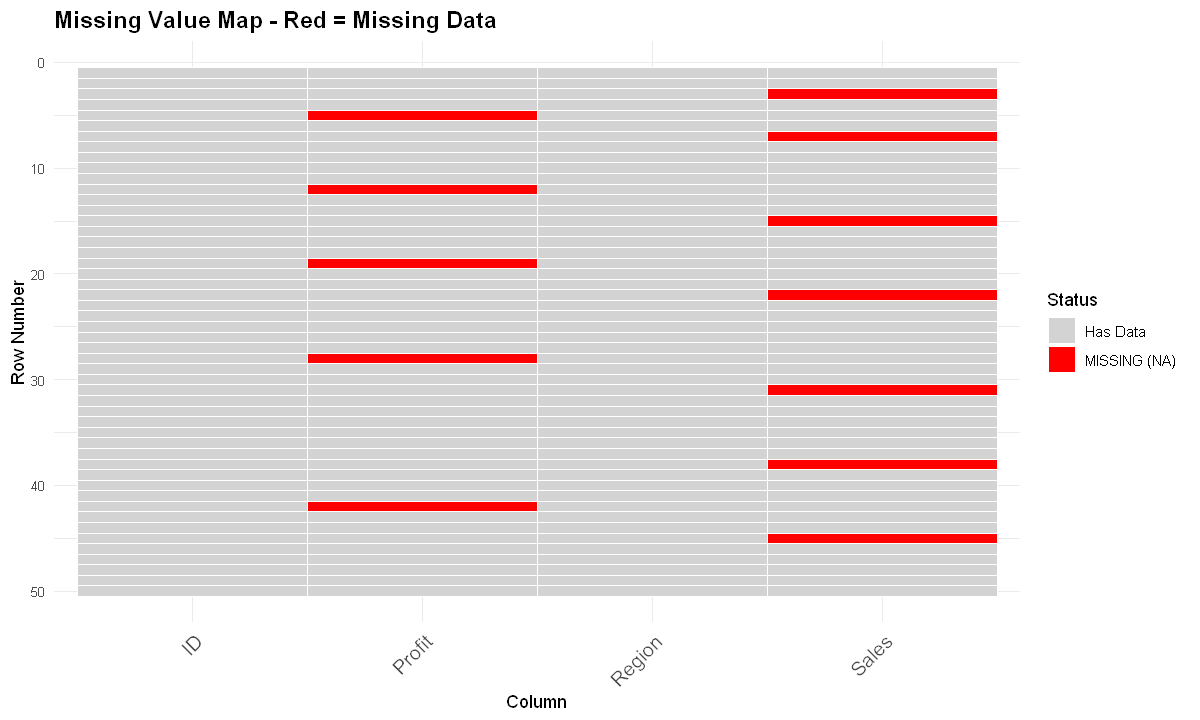

In [54]:
# 2. Identifying Missing Values

# Basic check - shows TRUE/FALSE for each cell (hard to read!)
# is.na(data_clean) 

# BETTER: Create a visual heatmap of missing values
# This shows exactly WHERE the missing values are located

# Install and load visualization package if needed
if (!require(ggplot2)) install.packages("ggplot2")

# Create a data frame showing missing value locations
missing_matrix <- is.na(data_clean)

# Convert to long format for visualization
missing_df <- data.frame(
  Row = rep(1:nrow(data_clean), ncol(data_clean)),
  Column = rep(names(data_clean), each = nrow(data_clean)),
  IsMissing = as.vector(missing_matrix)
)

# Create heatmap - RED = Missing (TRUE), GRAY = Has Data (FALSE)
ggplot(missing_df, aes(x = Column, y = Row, fill = IsMissing)) +
  geom_tile(color = "white", linewidth = 0.5) +
  scale_fill_manual(values = c("FALSE" = "lightgray", "TRUE" = "red"),
                    labels = c("Has Data", "MISSING (NA)"),
                    name = "Status") +
  scale_y_reverse() +  # Row 1 at top
  ggtitle("Missing Value Map - Red = Missing Data") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
        axis.text.y = element_text(size = 8),
        legend.position = "right") +
  labs(x = "Column", y = "Row Number")

## Counting Missing Values

Now let's get a summary of how many missing values we have in each column. This helps us understand the extent of the missing data problem.

### 🔍 Understanding `sapply()` - Apply a Function to Every Column

**What is `sapply()`?**
Think of `sapply()` as a super-efficient assistant who does the same task for every column in your data automatically.

**How does it work?**
```
sapply(data, function_to_apply)
```
- **First argument**: Your data (the whole table)
- **Second argument**: What you want to do to each column

**Our example: `sapply(data_clean, function(x) sum(is.na(x)))`**

Let's break this down step by step:
1. `sapply` says "I'll go through every column..."
2. `data_clean` is our table with the data
3. `function(x)` creates a mini-function where `x` represents each column, one at a time
4. `sum(is.na(x))` counts the NAs in that column

**In plain English:** "For each column in my data, count how many missing values there are."

### 🏢 Business Analogy
Imagine you have sales reports from 10 stores, and you want to know how many days each store forgot to report. Instead of checking each store manually, `sapply()` checks all stores at once and gives you a summary.

### Other Useful Code in This Section:
- **`sum(is.na(data_clean))`** - Counts ALL missing values in the entire dataset
- **`data_clean[!complete.cases(data_clean), ]`** - Shows only the "problem rows" that have at least one NA
  - The `!` means "NOT", so `!complete.cases()` means "incomplete cases"
  - The comma and empty space `[ , ]` means "show all columns"

---

### 🎯 HOW TO ADAPT THIS CODE

**To use on your own data, just change the dataset name:**

```r
# Template - replace "your_data" with your dataset name
sapply(your_data, function(x) sum(is.na(x)))  # NAs per column
sum(is.na(your_data))                          # Total NAs
your_data[!complete.cases(your_data), ]        # Problem rows
```

**Example with customer data:**
```r
customers <- read.csv("customers.csv")
sapply(customers, function(x) sum(is.na(x)))  # That's it!
```

In [55]:
# Count NA values per column
sapply(data_clean, function(x) sum(is.na(x))) # Apply sum(is.na()) to each column

# Count total NA values in the data frame
sum(is.na(data_clean)) # Total number of missing values across all columns

# Identify rows with any NA values
data_clean[!complete.cases(data_clean), ] # Show only rows that have at least one NA

ID  Sales Profit Region 
     0      7      5      0

[1] 12

,ID,Sales,Profit,Region
,<int>,<dbl>,<dbl>,<chr>
3,3,NA,13.899826,North
5,5,102.58575,NA,South
7,7,NA,9.785648,North
12,12,107.19628,NA,South
15,15,NA,11.898197,West
19,19,114.02712,NA,South
22,22,NA,10.265021,North
28,28,103.06746,NA,South
31,31,NA,8.576135,West


## Strategy 1: Removing Rows with Missing Values

**Complete case analysis** is the simplest approach - just remove any row that has missing values.

### 🔧 Understanding `na.omit()` - The Simple Cleaner

**What does it do?**
`na.omit(data)` scans your entire dataset and removes any row that contains at least one NA.

**How it works:**
```
data_removed_na <- na.omit(data_clean)
```
- Takes your messy data (`data_clean`)
- Removes all rows with NAs
- Saves the clean result to a new variable (`data_removed_na`)

**⚠️ Important:** This creates a NEW dataset - your original data is unchanged!

### 📊 Pros and Cons

| Pros ✅ | Cons ❌ |
|---------|---------|
| Simple and straightforward | Loses potentially valuable data |
| No guessing about missing values | Can reduce sample size significantly |
| No assumptions needed | May introduce bias if data isn't randomly missing |

### 🏢 Business Example
You have 1,000 customer records but 100 are missing email addresses. 
- Using `na.omit()` gives you 900 complete records
- But you lost 10% of your data!
- Is that acceptable? It depends on your analysis needs.

### When to use:
- When you have plenty of data and can afford to lose some
- When missing values appear to be random (not systematic)
- When you need a quick, simple solution

---

### 🎯 HOW TO ADAPT THIS CODE

**Template - just 2 lines!**
```r
your_data <- read.csv("your_file.csv")     # Load your data
clean_data <- na.omit(your_data)           # Remove rows with NAs
```

**Check how much data you lost:**
```r
cat("Before:", nrow(your_data), "rows\n")
cat("After:", nrow(clean_data), "rows\n")
cat("Removed:", nrow(your_data) - nrow(clean_data), "rows\n")
```

In [56]:
# 3. Strategies for Handling Missing Values

# a) Removal of rows with NA values
data_removed_na <- na.omit(data_clean) # Remove all rows containing any NA values
print("Data after removing NA rows:")
print(data_removed_na) # Display the cleaned dataset

[1] "Data after removing NA rows:"
   ID     Sales     Profit Region
1   1  88.79049   7.985576   West
2   2  95.39645   7.666723   East
4   4 101.41017   9.583155   West
6   6 134.30130   9.857266   East
8   8  74.69878  16.843011  South
9   9  86.26294   8.871145  South
10 10  91.08676  17.582353  North
11 11 124.48164   2.256236  North
13 13 108.01543  10.619271   East
14 14 102.21365  11.079708  South
16 16 135.73826   7.488383   West
17 17 109.95701   8.333963  South
18 18  60.66766   4.907123   East
20 20  90.54417  11.517643  South
21 21  78.64353  12.241049   West
23 23  79.47991  14.611337  South
24 24  85.42218  20.250423  South
25 25  87.49921   7.544844  South
26 26  66.26613  -1.545844  North
27 27 116.75574  15.028693   East
29 29  77.23726   6.559957  South
30 30 125.07630  15.127857  South
32 32  94.09857   3.896411   East
33 33 117.90251  10.906517   West
34 34 117.56267   9.305543  North
35 35 116.43162  10.028821  South
36 36 113.77281  11.926402  North
37 37 111.078

## Strategy 2: Imputation - Mean Replacement

**Mean imputation** replaces missing values with the average of the non-missing values. This lets you keep all your data!

### 🔧 Key Functions Explained:

**`%>%` - The Pipe Operator (Tidyverse Magic)**
- Pronounced "and then" or "pipe"
- Takes the result from the left and passes it to the function on the right
- Makes code read like a recipe: "Take data, AND THEN do this, AND THEN do that"
- *Think of it as a conveyor belt moving data through steps*

**`mutate()` - The Column Creator/Modifier**
- Creates new columns or modifies existing ones
- `mutate(new_column = some_calculation)` adds a new column based on a formula
- *Like adding a new column in Excel with a formula*

**`ifelse()` - The Decision Maker**
- Makes a choice based on a condition: "If this is true, do A, otherwise do B"
- Structure: `ifelse(condition, value_if_true, value_if_false)`
- *Like Excel's IF function!*

**`mean(Sales, na.rm = TRUE)` - The Average Calculator**
- Calculates the average (mean) of the Sales column
- `na.rm = TRUE` means "remove NAs before calculating" (na.rm = "NA remove")
- Without `na.rm = TRUE`, any NA would make the entire result NA!

### 📖 Reading the Code Like a Sentence:
```r
data_clean %>%
  mutate(Sales_imputed_mean = ifelse(is.na(Sales), 
                                     mean(Sales, na.rm = TRUE), 
                                     Sales))
```
**Translation:** "Take data_clean, AND THEN create a new column called Sales_imputed_mean where: IF Sales is missing, use the average Sales value, OTHERWISE keep the original Sales value."

### 🏢 Business Example
Your average monthly sales are $100,000. Three months have missing data. Mean imputation would fill those gaps with $100,000 each.

### ⚠️ Caution: 
Mean imputation reduces variability - all filled values are the same, which can make your data look more consistent than it actually is!

---

### 🎯 HOW TO ADAPT THIS CODE

**Template - change 3 things:**
```r
your_data %>%
  mutate(YOUR_COLUMN_imputed = ifelse(is.na(YOUR_COLUMN), 
                                       mean(YOUR_COLUMN, na.rm = TRUE), 
                                       YOUR_COLUMN))
```

**What to change:**
| Replace this | With your |
|--------------|-----------|
| `your_data` | Dataset name |
| `YOUR_COLUMN` | Column with missing values |
| `YOUR_COLUMN_imputed` | Name for new column (your choice) |

**Real example - Revenue column:**
```r
sales_data %>%
  mutate(Revenue_filled = ifelse(is.na(Revenue), 
                                  mean(Revenue, na.rm = TRUE), 
                                  Revenue))
```

In [57]:
# b) Imputation: Replacing NA values

# Mean imputation for 'Sales'
data_imputed_mean <- data_clean %>%
  mutate(Sales_imputed_mean = ifelse(is.na(Sales), # If Sales is NA...
                                   mean(Sales, na.rm = TRUE), # Replace with mean (excluding NAs)
                                   Sales)) # Otherwise keep original value
print("Data after mean imputation for Sales:")
print(data_imputed_mean)

[1] "Data after mean imputation for Sales:"
   ID     Sales     Profit Region Sales_imputed_mean
1   1  88.79049   7.985576   West           88.79049
2   2  95.39645   7.666723   East           95.39645
3   3        NA  13.899826  North          112.94177
4   4 101.41017   9.583155   West          101.41017
5   5 102.58575         NA  South          102.58575
6   6 134.30130   9.857266   East          134.30130
7   7        NA   9.785648  North          112.94177
8   8  74.69878  16.843011  South           74.69878
9   9  86.26294   8.871145  South           86.26294
10 10  91.08676  17.582353  North           91.08676
11 11 124.48164   2.256236  North          124.48164
12 12 107.19628         NA  South          107.19628
13 13 108.01543  10.619271   East          108.01543
14 14 102.21365  11.079708  South          102.21365
15 15        NA  11.898197   West          112.94177
16 16 135.73826   7.488383   West          135.73826
17 17 109.95701   8.333963  South          109.95701
18

## Strategy 3: Imputation - Median Replacement

**Median imputation** replaces missing values with the median (middle value) of non-missing values.

### 📊 Mean vs. Median: What's the Difference?

| Measure | Definition | Best For |
|---------|------------|----------|
| **Mean** | Sum of all values ÷ number of values | Data without extreme values |
| **Median** | The middle value when data is sorted | Data with outliers or skewed data |

### 🏢 Real-World Example: Employee Salaries
Consider these salaries: $40K, $45K, $50K, $55K, $500K (CEO)
- **Mean** = $138K (pulled up by the CEO's salary)
- **Median** = $50K (the actual middle value)

The median better represents a "typical" employee! This is why median is preferred when you have outliers.

### 🔧 Understanding `median()` - The Middle Finder
```r
median(Profit, na.rm = TRUE)
```
- Sorts all values from lowest to highest
- Returns the middle value
- `na.rm = TRUE` ignores missing values (same as with mean)

### 📖 Reading the Code:
```r
data_clean %>%
  mutate(Profit_imputed_median = ifelse(is.na(Profit), 
                                        median(Profit, na.rm = TRUE), 
                                        Profit))
```
**Translation:** "Take data_clean, AND THEN create a new column where: IF Profit is missing, use the median Profit, OTHERWISE keep the original Profit."

### ✅ When to Use Median Imputation:
- When your data has outliers (extreme high or low values)
- When data is skewed (not bell-shaped)
- For income, housing prices, or any data with extreme values
- When you want a more "typical" replacement value

---

### 🎯 HOW TO ADAPT THIS CODE

**Template - just swap `mean` for `median`:**
```r
your_data %>%
  mutate(YOUR_COLUMN_filled = ifelse(is.na(YOUR_COLUMN), 
                                      median(YOUR_COLUMN, na.rm = TRUE), 
                                      YOUR_COLUMN))
```

**Decision guide - which to use?**
| Your data has... | Use |
|------------------|-----|
| No extreme values | `mean()` |
| Outliers or skewed distribution | `median()` |
| Income, prices, or financial data | `median()` (usually safer) |

**Real example - Home prices:**
```r
housing %>%
  mutate(Price_filled = ifelse(is.na(Price), 
                                median(Price, na.rm = TRUE), 
                                Price))
```

In [58]:
# Median imputation for 'Profit'
data_imputed_median <- data_clean %>%
  mutate(Profit_imputed_median = ifelse(is.na(Profit), # If Profit is NA...
                                      median(Profit, na.rm = TRUE), # Replace with median (excluding NAs)
                                      Profit)) # Otherwise keep original value
print("Data after median imputation for Profit:")
print(data_imputed_median)

[1] "Data after median imputation for Profit:"
   ID     Sales     Profit Region Profit_imputed_median
1   1  88.79049   7.985576   West              7.985576
2   2  95.39645   7.666723   East              7.666723
3   3        NA  13.899826  North             13.899826
4   4 101.41017   9.583155   West              9.583155
5   5 102.58575         NA  South             10.265021
6   6 134.30130   9.857266   East              9.857266
7   7        NA   9.785648  North              9.785648
8   8  74.69878  16.843011  South             16.843011
9   9  86.26294   8.871145  South              8.871145
10 10  91.08676  17.582353  North             17.582353
11 11 124.48164   2.256236  North              2.256236
12 12 107.19628         NA  South             10.265021
13 13 108.01543  10.619271   East             10.619271
14 14 102.21365  11.079708  South             11.079708
15 15        NA  11.898197   West             11.898197
16 16 135.73826   7.488383   West              7.488383
1

## Strategy 4: Mode Imputation for Categorical Data

**Mode imputation** replaces missing values with the most frequently occurring value (the mode).

### 📊 Mean, Median, Mode - The Complete Picture

| Measure | Works With | Definition |
|---------|------------|------------|
| **Mean** | Numbers only | Average of all values |
| **Median** | Numbers only | Middle value |
| **Mode** | Numbers AND text! | Most frequently occurring value |

### 🏢 Business Example
Survey question: "How did you hear about us?"
Responses: Online (45), Friend (30), TV (25), ___missing___ (10)

You can't calculate the "average" of text! But you CAN use the mode: "Online" was most common, so fill missing with "Online".

### 🔧 Creating Our Own Mode Function

R doesn't have a built-in `mode()` function for this purpose, so we create our own:

```r
get_mode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}
```

**Breaking it down step by step:**

1. **`function(v)`** - Creates a new function that takes input `v` (our data)

2. **`unique(v)`** - Finds all unique values
   - If v = [Red, Blue, Red, Green, Red], unique gives [Red, Blue, Green]

3. **`match(v, uniqv)`** - Converts each value to its position number
   - Red=1, Blue=2, Green=3
   - [Red, Blue, Red, Green, Red] becomes [1, 2, 1, 3, 1]

4. **`tabulate()`** - Counts how often each position number appears
   - Position 1 appears 3 times, position 2 once, position 3 once
   - Result: [3, 1, 1]

5. **`which.max()`** - Finds which position has the highest count
   - Position 1 has count 3 (the highest)

6. **`uniqv[...]`** - Gets the actual value at that position
   - Position 1 = "Red" = the mode!

### Note:
Our Region column doesn't have NAs in this example, but this technique is essential for real business data with missing categorical values!

In [59]:
# Mode imputation for 'Region' (if it had NAs, for demonstration)
# Function to calculate mode (most frequent value)
get_mode <- function(v) {
  uniqv <- unique(v) # Get unique values
  uniqv[which.max(tabulate(match(v, uniqv)))] # Return the most frequent one
}

# Example: if Region had NAs, impute with mode
# data_imputed_mode <- data_clean %>%
#   mutate(Region_imputed_mode = ifelse(is.na(Region), # If Region is NA...
#                                     get_mode(Region[!is.na(Region)]), # Replace with mode
#                                     Region)) # Otherwise keep original
# print("Data after mode imputation for Region:")
# print(data_imputed_mode)

## Understanding Outliers

**Outliers** are data points that are significantly different from other observations. They can be:
- **Legitimate extreme values**: A $10M luxury home in a neighborhood of $300K homes
- **Data entry errors**: Someone typed $50,000 instead of $5,000
- **Measurement errors**: A faulty scale showing 500 lbs for a package

### 🏢 Business Impact of Outliers

| Scenario | Data | Outlier Effect |
|----------|------|----------------|
| Sales Analysis | Monthly sales: $10K, $12K, $11K, **$500K** | Average jumps from $11K to $133K! |
| Customer Age | Ages: 25, 30, 35, **150** (typo for 15) | Skews age demographics |
| Survey Scores | Ratings: 4, 5, 4, 5, **0** (angry customer) | Drags down average unfairly |

### Why Outliers Matter:
- **Can skew statistical analyses**: Mean and standard deviation are heavily affected
- **May indicate important rare events**: Could be a huge sale worth investigating!
- **Can dominate visualizations**: One extreme point stretches the whole chart
- **Need careful consideration**: Don't just delete them automatically!

### 🔧 Visualization with `ggplot2`

We'll use **ggplot2** to create visualizations. The basic structure is:
```r
ggplot(data, aes(x = column1, y = column2)) + 
  geom_type() + 
  other_options()
```

**Breaking it down:**
- **`ggplot(data, ...)`** - Starts a plot with your data
- **`aes()`** - "Aesthetics" - maps data columns to visual properties (x-axis, y-axis, color, etc.)
- **`+`** - Adds layers to the plot (like adding toppings to a pizza)
- **`geom_boxplot()`** - Adds a boxplot layer
- **`ggtitle()`** - Adds a title

---

### 🎯 HOW TO ADAPT THE BOXPLOT CODE

**Template for any numeric column:**
```r
ggplot(your_data, aes(y = YOUR_NUMERIC_COLUMN)) +
  geom_boxplot(fill = "lightblue", outlier.color = "red", outlier.size = 4) +
  ggtitle("Boxplot of YOUR_COLUMN_NAME")
```

**What to change:**
| Replace | With |
|---------|------|
| `your_data` | Your dataset name |
| `YOUR_NUMERIC_COLUMN` | Column you want to check for outliers |
| Title text | Descriptive title for your chart |

**Real example - Customer ages:**
```r
ggplot(customers, aes(y = Age)) +
  geom_boxplot(fill = "lightgreen", outlier.color = "red", outlier.size = 4) +
  ggtitle("Customer Age Distribution - Check for Outliers")
```

Let's visualize our data to spot outliers using a boxplot:

Warning message:
"Removed 7 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


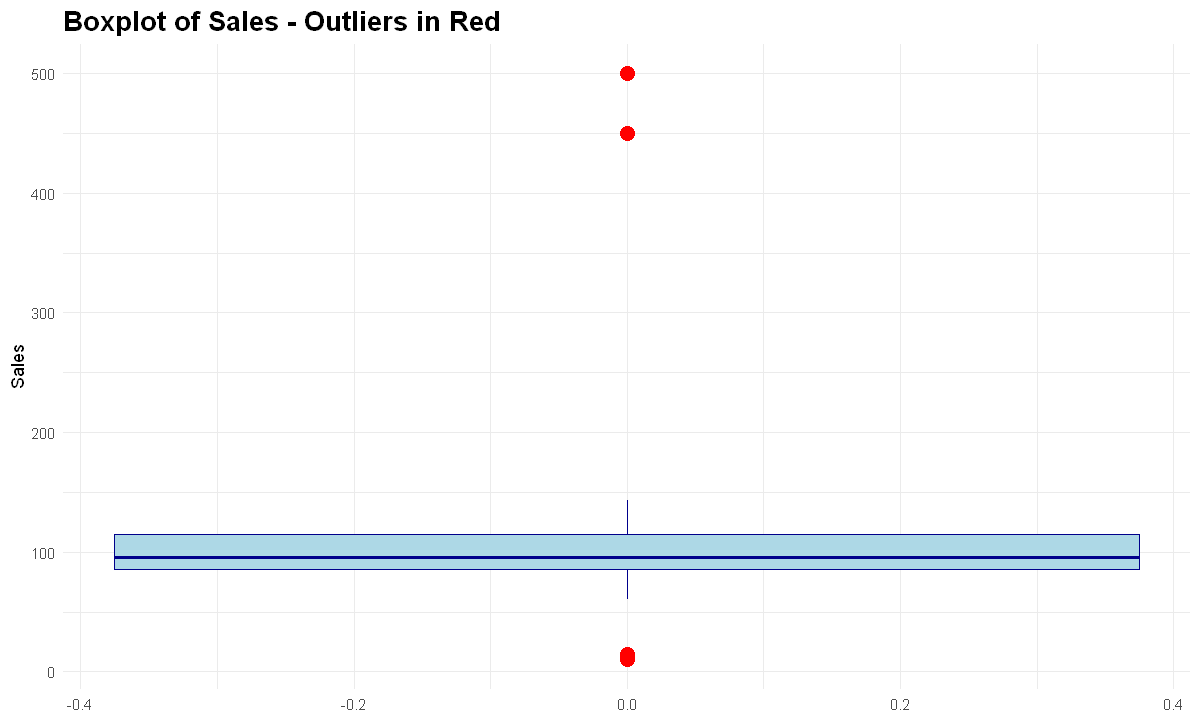

In [60]:
# 4. Identifying and Visualizing Outliers

# Set larger plot size
options(repr.plot.width = 10, repr.plot.height = 6)

# Boxplot for Sales with outliers highlighted in red
ggplot(data_clean, aes(y = Sales)) +
  geom_boxplot(fill = "lightblue", color = "darkblue", outlier.color = "red", outlier.size = 4) +
  ggtitle("Boxplot of Sales - Outliers in Red") +
  theme_minimal() +
  theme(plot.title = element_text(size = 16, face = "bold"))

## Scatter Plot for Relationship Analysis (with Outlier Detection)

**Scatter plots** show the relationship between two numeric variables by placing a dot for each data point.

### 📊 What This Code Does - The Big Picture

This scatter plot code does TWO things:
1. **Detects outliers** using the IQR method (math calculations)
2. **Creates a visualization** where outliers are colored red and normal points are blue

---

### 🔧 PART 1: Calculating Outlier Boundaries (Lines 2-13)

**For Sales column:**
```r
Q1_sales <- quantile(data_clean$Sales, 0.25, na.rm = TRUE)  # Find 25th percentile
Q3_sales <- quantile(data_clean$Sales, 0.75, na.rm = TRUE)  # Find 75th percentile
IQR_sales <- Q3_sales - Q1_sales                             # Calculate the range between them
upper_sales <- Q3_sales + 1.5 * IQR_sales                    # Upper boundary for outliers
lower_sales <- Q1_sales - 1.5 * IQR_sales                    # Lower boundary for outliers
```

**Line-by-line breakdown:**
| Line | What it does | Example (if Q1=80, Q3=120) |
|------|--------------|---------------------------|
| `Q1_sales <- quantile(..., 0.25)` | Finds the value where 25% of data is below | Q1 = $80 |
| `Q3_sales <- quantile(..., 0.75)` | Finds the value where 75% of data is below | Q3 = $120 |
| `IQR_sales <- Q3 - Q1` | Calculates the middle 50% range | IQR = $40 |
| `upper_sales <- Q3 + 1.5 * IQR` | Sets upper limit | $120 + $60 = $180 |
| `lower_sales <- Q1 - 1.5 * IQR` | Sets lower limit | $80 - $60 = $20 |

*The same calculations are repeated for Profit!*

---

### 🔧 PART 2: Flagging Each Row as Outlier or Normal (Lines 16-20)

```r
data_clean <- data_clean %>%
  mutate(is_outlier = ifelse(
    (Sales > upper_sales | Sales < lower_sales | Profit > upper_profit | Profit < lower_profit),
    "Outlier", "Normal"
  ))
```

**Breaking this down:**
- `data_clean <- data_clean %>%` → "Take data_clean, modify it, and save the result back"
- `mutate(is_outlier = ...)` → "Add a new column called 'is_outlier'"
- The `ifelse()` checks: "Is Sales too high OR too low OR is Profit too high OR too low?"
  - If YES to any → label as `"Outlier"`
  - If NO to all → label as `"Normal"`

**The `|` symbol means "OR"** - if ANY condition is true, it's an outlier!

---

### 🔧 PART 3: Creating the Plot (Lines 23-29)

```r
ggplot(data_clean, aes(x = Profit, y = Sales, color = is_outlier)) +
  geom_point(size = 3, alpha = 0.7) +
  scale_color_manual(values = c("Normal" = "steelblue", "Outlier" = "red")) +
  ggtitle("Scatter Plot of Sales vs. Profit - Outliers Highlighted") +
  theme_minimal() +
  theme(plot.title = element_text(size = 16, face = "bold"),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 10))
```

**Line-by-line explanation:**

| Line | Function | What it does |
|------|----------|--------------|
| `ggplot(data_clean, aes(...))` | Sets up the plot | Tells ggplot what data and axes to use |
| `aes(x = Profit, y = Sales)` | Maps columns to axes | Profit → horizontal, Sales → vertical |
| `aes(color = is_outlier)` | Maps color to our flag | Points will be colored based on outlier status |
| `geom_point(size = 3, alpha = 0.7)` | Draws the dots | `size = 3` makes bigger dots, `alpha = 0.7` makes them slightly transparent |
| `scale_color_manual(...)` | Sets specific colors | Normal = steelblue, Outlier = red |
| `ggtitle(...)` | Adds a title | The text at the top of the chart |
| `theme_minimal()` | Clean background | Removes unnecessary gridlines and clutter |
| `theme(plot.title = ...)` | Styles the title | Makes it size 16 and bold |

---

### 🏢 What to Look For in the Output:
- **Blue cluster**: Your normal, expected data points
- **Red dots**: Outliers that need investigation
- **Patterns**: Do outliers appear in certain areas? (e.g., all high Sales, all low Profit?)
- **Count**: How many outliers do you have? Too many might indicate a problem with your thresholds

Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_point()`)."


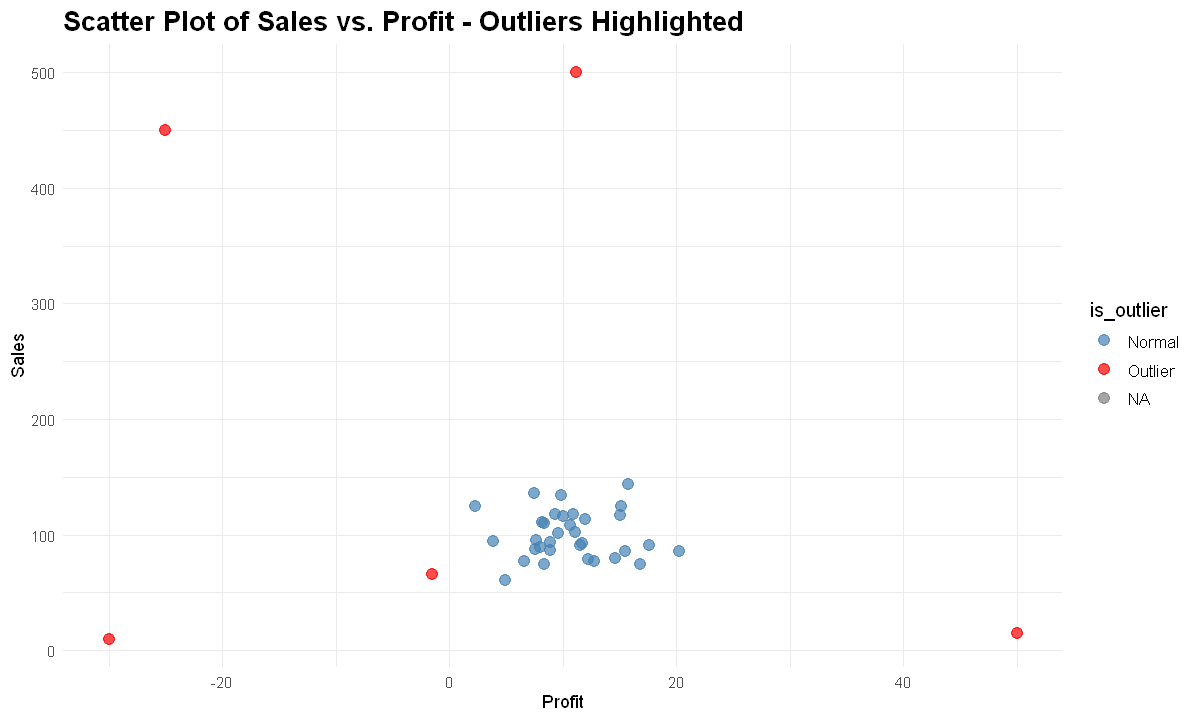

In [61]:
# Scatter plot for Sales vs. Profit with outliers highlighted
# First, identify outliers based on IQR method
Q1_sales <- quantile(data_clean$Sales, 0.25, na.rm = TRUE)
Q3_sales <- quantile(data_clean$Sales, 0.75, na.rm = TRUE)
IQR_sales <- Q3_sales - Q1_sales
upper_sales <- Q3_sales + 1.5 * IQR_sales
lower_sales <- Q1_sales - 1.5 * IQR_sales

Q1_profit <- quantile(data_clean$Profit, 0.25, na.rm = TRUE)
Q3_profit <- quantile(data_clean$Profit, 0.75, na.rm = TRUE)
IQR_profit <- Q3_profit - Q1_profit
upper_profit <- Q3_profit + 1.5 * IQR_profit
lower_profit <- Q1_profit - 1.5 * IQR_profit

# Add outlier flag to data
data_clean <- data_clean %>%
  mutate(is_outlier = ifelse(
    (Sales > upper_sales | Sales < lower_sales | Profit > upper_profit | Profit < lower_profit),
    "Outlier", "Normal"
  ))

# Create scatter plot with outliers colored red
ggplot(data_clean, aes(x = Profit, y = Sales, color = is_outlier)) +
  geom_point(size = 3, alpha = 0.7) +
  scale_color_manual(values = c("Normal" = "steelblue", "Outlier" = "red")) +
  ggtitle("Scatter Plot of Sales vs. Profit - Outliers Highlighted") +
  theme_minimal() +
  theme(plot.title = element_text(size = 16, face = "bold"),
        legend.title = element_text(size = 12),
        legend.text = element_text(size = 10))

## The IQR Method for Detecting Outliers

**IQR (Interquartile Range)** is a statistical method to systematically identify outliers - no guessing required!

### 📊 Understanding Quartiles - Dividing Data into Quarters

Imagine sorting all your data from lowest to highest and dividing into 4 equal parts:

```
[----25%----][----25%----][----25%----][----25%----]
     ↑              ↑              ↑
    Q1            Q2(Median)       Q3
```

| Term | Meaning | Percentile |
|------|---------|------------|
| **Q1** | First Quartile | 25th percentile (25% of data is below) |
| **Q2** | Second Quartile | 50th percentile (the median) |
| **Q3** | Third Quartile | 75th percentile (75% of data is below) |
| **IQR** | Q3 - Q1 | The range containing the middle 50% of data |

### 🔧 Understanding the Functions:

**`quantile(data, 0.25, na.rm = TRUE)`** - The Percentile Calculator
- Returns the value at a specific percentile
- `0.25` = 25th percentile (Q1)
- `0.75` = 75th percentile (Q3)

### 📐 The 1.5 × IQR Rule

**Outlier boundaries:**
- **Lower boundary** = Q1 - 1.5 × IQR
- **Upper boundary** = Q3 + 1.5 × IQR

Any value outside these boundaries is considered an outlier.

**Why 1.5?** This is a statistical convention that captures approximately 99.3% of data in a normal distribution. Values beyond this are rare enough to be considered unusual.

### 🏢 Business Example:
If employee salaries have Q1=$40K, Q3=$80K:
- IQR = $80K - $40K = $40K
- Lower boundary = $40K - (1.5 × $40K) = -$20K (so effectively $0)
- Upper boundary = $80K + (1.5 × $40K) = $140K
- Anyone earning above $140K would be flagged as an outlier

---

### 🎯 HOW TO ADAPT THE IQR CODE

**Complete template - works for ANY numeric column:**
```r
# ========================================
# IQR OUTLIER DETECTION - TEMPLATE
# Replace "your_data" and "YourColumn"
# ========================================

# Step 1: Calculate boundaries
Q1 <- quantile(your_data$YourColumn, 0.25, na.rm = TRUE)
Q3 <- quantile(your_data$YourColumn, 0.75, na.rm = TRUE)
IQR_value <- Q3 - Q1
upper_limit <- Q3 + 1.5 * IQR_value
lower_limit <- Q1 - 1.5 * IQR_value

# Step 2: Find the outliers
your_data %>%
  filter(YourColumn > upper_limit | YourColumn < lower_limit)

# Step 3: Print the boundaries (optional but helpful)
cat("Lower limit:", lower_limit, "\n")
cat("Upper limit:", upper_limit, "\n")
```

**Real example - Employee salaries:**
```r
Q1 <- quantile(employees$Salary, 0.25, na.rm = TRUE)
Q3 <- quantile(employees$Salary, 0.75, na.rm = TRUE)
IQR_value <- Q3 - Q1
upper_limit <- Q3 + 1.5 * IQR_value
lower_limit <- Q1 - 1.5 * IQR_value

employees %>% filter(Salary > upper_limit | Salary < lower_limit)
```

Let's apply this method to identify outliers in our Sales data:

In [62]:
# Using IQR method to identify outliers
# For Sales
Q1_sales <- quantile(data_clean$Sales, 0.25, na.rm = TRUE) # 25th percentile
Q3_sales <- quantile(data_clean$Sales, 0.75, na.rm = TRUE) # 75th percentile
IQR_sales <- Q3_sales - Q1_sales # Interquartile range

# Calculate outlier boundaries using 1.5 * IQR rule
outlier_threshold_upper_sales <- Q3_sales + 1.5 * IQR_sales # Upper boundary
outlier_threshold_lower_sales <- Q1_sales - 1.5 * IQR_sales # Lower boundary

# Find and display outliers
data_clean %>%
  filter(Sales > outlier_threshold_upper_sales | Sales < outlier_threshold_lower_sales)

ID,Sales,Profit,Region,is_outlier
<int>,<dbl>,<dbl>,<chr>,<chr>
47,500,11.19366,West,Outlier
48,10,-30.00000,East,Outlier
49,450,-25.00000,South,Outlier
50,15,50.00000,South,Outlier


## Identifying Outliers in Profit Data

Let's apply the same IQR method to our Profit variable. This systematic approach ensures we're consistent in how we identify outliers across different variables.

### 🔧 Understanding `filter()` - The Data Selector

The `filter()` function keeps only rows that meet certain conditions:
```r
data %>% filter(condition)
```

**In our code:**
```r
data_clean %>%
  filter(Sales > upper_threshold | Sales < lower_threshold)
```

**Key operators:**
- `>` greater than
- `<` less than
- `|` means "OR" - row is kept if EITHER condition is true
- `&` means "AND" - row is kept only if BOTH conditions are true

**Translation:** "From data_clean, keep only rows where Sales is EITHER above the upper threshold OR below the lower threshold" → This gives us only the outliers!

### 🏢 Why Check Multiple Variables?

In business data, outliers might appear in different columns:
- A sale with unusually HIGH revenue but NORMAL profit (maybe a low-margin bulk deal)
- A sale with NORMAL revenue but unusually LOW profit (maybe a discount gone wrong)

Checking each variable separately helps you understand where the unusual data points are coming from.

In [63]:
# For Profit
Q1_profit <- quantile(data_clean$Profit, 0.25, na.rm = TRUE) # 25th percentile
Q3_profit <- quantile(data_clean$Profit, 0.75, na.rm = TRUE) # 75th percentile
IQR_profit <- Q3_profit - Q1_profit # Interquartile range

# Calculate outlier boundaries using 1.5 * IQR rule
outlier_threshold_upper_profit <- Q3_profit + 1.5 * IQR_profit # Upper boundary
outlier_threshold_lower_profit <- Q1_profit - 1.5 * IQR_profit # Lower boundary

# Find and display outliers
data_clean %>%
  filter(Profit > outlier_threshold_upper_profit | Profit < outlier_threshold_lower_profit)

ID,Sales,Profit,Region,is_outlier
<int>,<dbl>,<dbl>,<chr>,<chr>
26,66.26613,-1.545844,North,Outlier
48,10.00000,-30.000000,East,Outlier
49,450.00000,-25.000000,South,Outlier
50,15.00000,50.000000,South,Outlier


## Outlier Treatment Method 1: Capping (Winsorization)

**Capping** (also called Winsorization) replaces outliers with the boundary values rather than removing them entirely.

### 🔧 How Capping Works:

| Original Value | Compared to Thresholds | Result |
|----------------|------------------------|--------|
| Above upper threshold | Too high | Replace with upper threshold |
| Below lower threshold | Too low | Replace with lower threshold |
| Within bounds | Normal | Keep original value |

### 📖 Reading the Code - Nested `ifelse()`:
```r
mutate(Sales_capped = ifelse(Sales > outlier_threshold_upper_sales,
                             outlier_threshold_upper_sales,
                             ifelse(Sales < outlier_threshold_lower_sales,
                                    outlier_threshold_lower_sales,
                                    Sales)))
```

**Step-by-step translation:**
1. "IF Sales is too high, replace with upper threshold..."
2. "OTHERWISE, check IF Sales is too low, replace with lower threshold..."
3. "OTHERWISE, keep the original Sales value"

It's like a decision tree: check one condition, if not met, check another.

### 🏢 Business Example:
Customer satisfaction scores should be 1-5, but one response was recorded as 50 (typo for 5):
- Without capping: Score of 50 skews your average
- With capping: Score becomes 5 (the maximum allowed)
- You keep the customer record but fix the extreme value

### ✅ Advantages of Capping:
- **Preserves sample size**: No data loss
- **Reduces outlier impact**: Extreme values are brought "into range"
- **Maintains data structure**: All original rows still exist
- **Good for when you suspect errors**: Keeps the observation, fixes the extreme value

---

### 🎯 HOW TO ADAPT THE CAPPING CODE

**Complete template:**
```r
# First, calculate your thresholds (from IQR method)
Q1 <- quantile(your_data$YourColumn, 0.25, na.rm = TRUE)
Q3 <- quantile(your_data$YourColumn, 0.75, na.rm = TRUE)
IQR_value <- Q3 - Q1
upper_limit <- Q3 + 1.5 * IQR_value
lower_limit <- Q1 - 1.5 * IQR_value

# Then apply capping
your_data_capped <- your_data %>%
  mutate(YourColumn_capped = ifelse(YourColumn > upper_limit,
                                     upper_limit,
                                     ifelse(YourColumn < lower_limit,
                                            lower_limit,
                                            YourColumn)))
```

**Simpler alternative using `pmin()` and `pmax()`:**
```r
your_data %>%
  mutate(YourColumn_capped = pmin(pmax(YourColumn, lower_limit), upper_limit))
```
*This one-liner does the same thing! `pmax` ensures values aren't below lower_limit, `pmin` ensures they're not above upper_limit.*

In [64]:
# 5. Basic Outlier Treatment

# a) Capping (Winsorization) for Sales
# Replace outliers with the upper/lower threshold
data_capped <- data_clean %>%
  mutate(Sales_capped = ifelse(Sales > outlier_threshold_upper_sales, # If above upper threshold...
                              outlier_threshold_upper_sales, # Replace with upper threshold
                              ifelse(Sales < outlier_threshold_lower_sales, # If below lower threshold...
                                    outlier_threshold_lower_sales, # Replace with lower threshold
                                    Sales))) # Otherwise keep original value
print("Data after capping Sales outliers:")
print(data_capped)

[1] "Data after capping Sales outliers:"
   ID     Sales     Profit Region is_outlier Sales_capped
1   1  88.79049   7.985576   West     Normal     88.79049
2   2  95.39645   7.666723   East     Normal     95.39645
3   3        NA  13.899826  North       <NA>           NA
4   4 101.41017   9.583155   West     Normal    101.41017
5   5 102.58575         NA  South       <NA>    102.58575
6   6 134.30130   9.857266   East     Normal    134.30130
7   7        NA   9.785648  North       <NA>           NA
8   8  74.69878  16.843011  South     Normal     74.69878
9   9  86.26294   8.871145  South     Normal     86.26294
10 10  91.08676  17.582353  North     Normal     91.08676
11 11 124.48164   2.256236  North     Normal    124.48164
12 12 107.19628         NA  South       <NA>    107.19628
13 13 108.01543  10.619271   East     Normal    108.01543
14 14 102.21365  11.079708  South     Normal    102.21365
15 15        NA  11.898197   West       <NA>           NA
16 16 135.73826   7.488383   We

In [65]:
# b) Removal of outliers
data_outliers_removed <- data_clean %>%
  # Keep only rows where Sales is within acceptable range
  filter(Sales <= outlier_threshold_upper_sales & Sales >= outlier_threshold_lower_sales) %>%
  # Keep only rows where Profit is within acceptable range
  filter(Profit <= outlier_threshold_upper_profit & Profit >= outlier_threshold_lower_profit)
print("Data after removing outliers:")
print(data_outliers_removed)

[1] "Data after removing outliers:"
   ID     Sales    Profit Region is_outlier
1   1  88.79049  7.985576   West     Normal
2   2  95.39645  7.666723   East     Normal
3   4 101.41017  9.583155   West     Normal
4   6 134.30130  9.857266   East     Normal
5   8  74.69878 16.843011  South     Normal
6   9  86.26294  8.871145  South     Normal
7  10  91.08676 17.582353  North     Normal
8  11 124.48164  2.256236  North     Normal
9  13 108.01543 10.619271   East     Normal
10 14 102.21365 11.079708  South     Normal
11 16 135.73826  7.488383   West     Normal
12 17 109.95701  8.333963  South     Normal
13 18  60.66766  4.907123   East     Normal
14 20  90.54417 11.517643  South     Normal
15 21  78.64353 12.241049   West     Normal
16 23  79.47991 14.611337  South     Normal
17 24  85.42218 20.250423  South     Normal
18 25  87.49921  7.544844  South     Normal
19 27 116.75574 15.028693   East     Normal
20 29  77.23726  6.559957  South     Normal
21 30 125.07630 15.127857  South     Nor

## Outlier Treatment Method 2: Removal

**Outlier removal** completely eliminates rows containing outlier values from the dataset.

### 🔧 Reading the Removal Code:
```r
data_outliers_removed <- data_clean %>%
  filter(Sales <= upper_threshold & Sales >= lower_threshold) %>%
  filter(Profit <= upper_threshold & Profit >= lower_threshold)
```

**Step-by-step translation:**
1. "Take data_clean, AND THEN..."
2. "Keep only rows where Sales is between the lower and upper bounds, AND THEN..."
3. "Keep only rows where Profit is also between its bounds"

**Note:** Each `filter()` step can remove rows, so chaining them removes rows failing EITHER condition.

### 📊 Comparison: Capping vs. Removal

| Aspect | Capping | Removal |
|--------|---------|---------|
| **Data loss** | None - all rows kept | Yes - rows with outliers deleted |
| **Sample size** | Unchanged | Reduced |
| **Outlier values** | Modified to boundary | Completely gone |
| **Best for** | When you want to keep observations | When outliers are clearly errors |

### 🏢 When to Remove Outliers:
- **Clear data entry errors**: Age = 999, Price = -$500
- **Impossible values**: Test scores above 100%
- **Equipment malfunction**: Sensor readings during known failures

### ⚠️ Important Considerations:
1. **Document everything**: Record which rows you removed and why
2. **Never automatically delete**: Always investigate outliers first
3. **Consider the impact**: Removing data can bias your results
4. **Keep original data**: Save the unmodified dataset separately

### 💡 Pro Tip:
Create a "removed_outliers" dataset to review later - those extreme values might contain important business insights!

---

### 🎯 HOW TO ADAPT THE REMOVAL CODE

**Template for removing outliers from one column:**
```r
# Calculate thresholds first
Q1 <- quantile(your_data$YourColumn, 0.25, na.rm = TRUE)
Q3 <- quantile(your_data$YourColumn, 0.75, na.rm = TRUE)
IQR_value <- Q3 - Q1
upper_limit <- Q3 + 1.5 * IQR_value
lower_limit <- Q1 - 1.5 * IQR_value

# Remove outliers
clean_data <- your_data %>%
  filter(YourColumn >= lower_limit & YourColumn <= upper_limit)
```

**Template for multiple columns:**
```r
clean_data <- your_data %>%
  filter(Column1 >= lower1 & Column1 <= upper1) %>%
  filter(Column2 >= lower2 & Column2 <= upper2)
```

**Save the outliers for review (recommended!):**
```r
# Keep the outliers separately
outliers_to_review <- your_data %>%
  filter(YourColumn < lower_limit | YourColumn > upper_limit)

# Check what you're removing
print(paste("Removing", nrow(outliers_to_review), "outliers"))
print(outliers_to_review)
```

## Key Decisions in Data Cleaning

**Important principle:** The choice of how to handle missing values and outliers depends on:

### 📊 **Context and Domain Knowledge**
- **Business understanding**: Is a $500 sale realistic or an error?
- **Data collection process**: How were these values recorded?
- **Impact on analysis**: Will outliers skew our results?

### 📝 **Documentation is Critical**
- **Record your decisions**: What did you change and why?
- **Be transparent**: Others need to understand your methodology
- **Consider alternatives**: What would happen with different approaches?

### ⚖️ **Trade-offs to Consider**
- **Sample size vs. data quality**: Remove vs. impute?
- **Bias vs. completeness**: Are missing values random?
- **Accuracy vs. precision**: Better to be approximately right than precisely wrong

**Remember:** There's rarely one "correct" way to clean data - it's about making informed, defensible decisions!

In [66]:
# Note: The choice of handling missing values and outliers depends on the context and domain knowledge.
# Always document your decisions and reasoning for future reference.

## Lesson 2 Summary: Data Cleaning Mastery

Congratulations! You've learned essential data cleaning techniques. Here's what you can now do:

### 🔍 **Missing Value Detection**
- Use `is.na()` to identify missing values
- Count NAs with `sum(is.na())` and `sapply()`
- Find incomplete rows with `complete.cases()`

### 🛠️ **Missing Value Treatment Strategies**
- **Removal**: `na.omit()` for complete case analysis
- **Mean imputation**: Replace NAs with average values
- **Median imputation**: Better for skewed data and outliers
- **Mode imputation**: For categorical variables

### 📊 **Outlier Detection Methods**
- **Visual inspection**: Boxplots and scatter plots
- **IQR method**: Statistical approach using quartiles
- **Threshold calculation**: Q1/Q3 ± 1.5 × IQR

### ⚒️ **Outlier Treatment Techniques**
- **Capping (Winsorization)**: Replace with boundary values
- **Removal**: Filter out extreme values
- **Documentation**: Always record your decisions and reasoning

### 🎯 **Key Takeaways**
- **No single correct approach**: Context and domain knowledge matter
- **Document everything**: Your future self will thank you
- **Consider trade-offs**: Sample size vs. data quality
- **Visualize first**: Always look at your data before cleaning

### 📈 **Next Steps**
You're now ready for:
- Advanced data manipulation with dplyr
- Data transformation and feature engineering
- Statistical analysis with clean, reliable data
- Creating meaningful visualizations

**Practice tip:** Try these techniques on real datasets to build your data cleaning intuition!